
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission
---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# Review the DataFrame
applicant_data_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 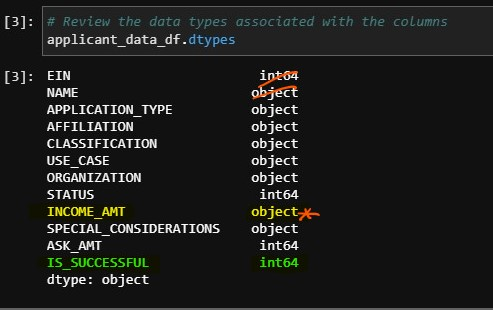

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:5]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [5]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [7]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [8]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Review the DataFrame
encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [9]:
numerical_variables_df = applicant_data_df.drop(columns = categorical_variables)

# Review the DataFrame
numerical_variables_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,5000,1
1,1,108590,1
2,1,5000,0
3,1,6692,1
4,1,142590,1


In [10]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# Review the Dataframe
fully_encoded_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
applicant_data_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [12]:
fully_encoded_df.dtypes

STATUS                        int64
ASK_AMT                       int64
IS_SUCCESSFUL                 int64
APPLICATION_TYPE_T10        float64
APPLICATION_TYPE_T12        float64
                             ...   
INCOME_AMT_25000-99999      float64
INCOME_AMT_50M+             float64
INCOME_AMT_5M-10M           float64
SPECIAL_CONSIDERATIONS_N    float64
SPECIAL_CONSIDERATIONS_Y    float64
Length: 117, dtype: object

### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the  DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [13]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# Display a sample of y
y[:5]

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [14]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# Review the features DataFrame
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [15]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [17]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

116

In [18]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [19]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features + number_output_neurons) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer1

58

In [20]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + number_output_neurons) // 2
# Review the number hidden nodes in the second layer
hidden_nodes_layer2

29

In [21]:
# Create the Sequential model instance
nn = Sequential() 

In [22]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [23]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [24]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [25]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 58)                6786      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1711      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 30        
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [26]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Fit the model using 50 epochs and the training data
fit_model_00 = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 750us/step - loss: 0.6045 - accuracy: 0.7048
Epoch 2/50
804/804 [==============================] - 1s 730us/step - loss: 0.5570 - accuracy: 0.7260
Epoch 3/50
804/804 [==============================] - 1s 775us/step - loss: 0.5508 - accuracy: 0.7300
Epoch 4/50
804/804 [==============================] - 1s 740us/step - loss: 0.5534 - accuracy: 0.7259
Epoch 5/50
804/804 [==============================] - 1s 729us/step - loss: 0.5426 - accuracy: 0.7392
Epoch 6/50
804/804 [==============================] - 1s 765us/step - loss: 0.5429 - accuracy: 0.7364
Epoch 7/50
804/804 [==============================] - 1s 737us/step - loss: 0.5387 - accuracy: 0.7379
Epoch 8/50
804/804 [==============================] - 1s 777us/step - loss: 0.5402 - accuracy: 0.7370
Epoch 9/50
804/804 [==============================] - 1s 805us/step - loss: 0.5379 - accuracy: 0.7367
Epoch 10/50
804/804 [==============================] - 1s 756us/step - loss: 0.538

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [28]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_00, model_accuracy_00 = nn.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"ORIGINAL Model - Loss: {model_loss_00}, Accuracy: {model_accuracy_00}")

268/268 [==============================] - 0s 577us/step - loss: 0.5549 - accuracy: 0.7296
ORIGINAL Model - Loss: 0.5549191236495972, Accuracy: 0.7295626997947693


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [29]:
# Set the model's file path
file_path = Path("./Resources/AlphabetSoup_00.h5")
# Export your model to a HDF5 file
nn.save(file_path)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


In [30]:
# Drop the other columns from the DataFrame as needed
applicant_data_df_cropped = applicant_data_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])


#.drop(columns = ["AFFILIATION", "APPLICATION_TYPE", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "ASK_AMT", "STATUS", "USE_CASE", "SPECIAL_CONSIDERATIONS"])

# # Review the DataFrame
applicant_data_df_cropped[:15]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [31]:
# Create a list of categorical variables 
categorical_variables_cropped = list(applicant_data_df_cropped.dtypes[applicant_data_df_cropped.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_cropped

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [33]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df_cropped[categorical_variables_cropped])

In [34]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables_cropped)
)

# # Review the DataFrame
# encoded_df.head()

In [35]:
numerical_variables_df = applicant_data_df_cropped.drop(columns = categorical_variables_cropped
                                                       )

# # Review the DataFrame
# numerical_variables_df.head()

In [36]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [37]:
applicant_data_df_cropped.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [38]:
fully_encoded_df.dtypes

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_T10      float64
APPLICATION_TYPE_T12      float64
                           ...   
INCOME_AMT_10M-50M        float64
INCOME_AMT_1M-5M          float64
INCOME_AMT_25000-99999    float64
INCOME_AMT_50M+           float64
INCOME_AMT_5M-10M         float64
Length: 115, dtype: object

In [39]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [40]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [41]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [42]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Alternative Model 41+

In [43]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [44]:
# Define the number of neurons in the output layer
number_output_neurons_A41 = 1

In [45]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A41 = number_input_features
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A41

114

In [46]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A41 = hidden_nodes_layer1_A41

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A41

114

In [47]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A41 = hidden_nodes_layer2_A41
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A41

114

In [48]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A41 = hidden_nodes_layer3_A41
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A41

114

In [49]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A41 = hidden_nodes_layer4_A41
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A41

114

In [50]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A41 = (hidden_nodes_layer5_A41 + number_output_neurons_A41) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A41

57

In [51]:
# Create and Display the Sequential Model Instance 
# for Model A41
nn_A41 = Sequential() 

# Add the first hidden layer
nn_A41.add(Dense(units=hidden_nodes_layer1_A41, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A41.add(Dense(units=hidden_nodes_layer2_A41, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A41.add(Dense(units=hidden_nodes_layer3_A41, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A41.add(Dense(units=hidden_nodes_layer4_A41, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A41.add(Dense(units=hidden_nodes_layer5_A41, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A41.add(Dense(units=hidden_nodes_layer6_A41, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A41.add(Dense(units=number_output_neurons_A41, activation="sigmoid"))

# Display the Sequential model summary
nn_A41.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_4 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_5 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_6 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_7 (Dense)              (None, 114)               13110     
_________________________________________________________________
dense_8 (Dense)              (None, 57)                6555      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [52]:
# Compile the Sequential model
nn_A41.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [53]:
# Fit the model using 50 epochs and the training data
fit_model_A41 = nn_A41.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.2031 - accuracy: 0.6968 - val_loss: 0.1842 - val_accuracy: 0.7367
Epoch 2/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1864 - accuracy: 0.7281 - val_loss: 0.1829 - val_accuracy: 0.7387
Epoch 3/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1846 - accuracy: 0.7345 - val_loss: 0.1833 - val_accuracy: 0.7396
Epoch 4/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1848 - accuracy: 0.7313 - val_loss: 0.1830 - val_accuracy: 0.7334
Epoch 5/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1860 - accuracy: 0.7274 - val_loss: 0.1826 - val_accuracy: 0.7392
Epoch 6/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1813 - accuracy: 0.7362 - val_loss: 0.1831 - val_accuracy: 0.7400
Epoch 7/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.1844 - accuracy: 0.7312 - val_loss: 0.1837 - val_accuracy:

In [54]:
print("Alternative Model 41 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A41.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 41 Results
Loss: 0.1888144314289093, Accuracy: 0.7306122183799744


# Alternative Model 25+

In [55]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [56]:
# Define the number of neurons in the output layer
number_output_neurons_A25 = 1

In [57]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A25 =  (number_input_features + number_output_neurons_A25) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A25

57

In [58]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A25 =  (hidden_nodes_layer1_A25 + number_output_neurons_A25) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A25

29

In [59]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A25 =  (hidden_nodes_layer2_A25 + number_output_neurons_A25) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A25

15

In [60]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A25 =  (hidden_nodes_layer3_A25 + number_output_neurons_A25) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A25

8

In [61]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A25 =  (hidden_nodes_layer4_A25 + number_output_neurons_A25) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A25

4

In [62]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A25 =  (hidden_nodes_layer5_A25 + number_output_neurons_A25) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A25

2

In [63]:
# Create and Display the Sequential Model Instance 
# for Model A25
nn_A25 = Sequential() 

# Add the first hidden layer
nn_A25.add(Dense(units=hidden_nodes_layer1_A25, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A25.add(Dense(units=hidden_nodes_layer2_A25, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A25.add(Dense(units=hidden_nodes_layer3_A25, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A25.add(Dense(units=hidden_nodes_layer4_A25, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A25.add(Dense(units=hidden_nodes_layer5_A25, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A25.add(Dense(units=hidden_nodes_layer6_A25, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A25.add(Dense(units=number_output_neurons_A25, activation="sigmoid"))

# Display the Sequential model summary
nn_A25.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_11 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_12 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

In [64]:
# Compile the Sequential model
nn_A25.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [65]:
# Fit the model using 50 epochs and the training data
fit_model_A25 = nn_A25.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2239 - accuracy: 0.6623 - val_loss: 0.2041 - val_accuracy: 0.7321
Epoch 2/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1994 - accuracy: 0.7293 - val_loss: 0.1943 - val_accuracy: 0.7317
Epoch 3/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1933 - accuracy: 0.7324 - val_loss: 0.1920 - val_accuracy: 0.7315
Epoch 4/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1909 - accuracy: 0.7294 - val_loss: 0.1876 - val_accuracy: 0.7366
Epoch 5/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1918 - accuracy: 0.7244 - val_loss: 0.1876 - val_accuracy: 0.7335
Epoch 6/1000
563/563 [==============================] - 1s 993us/step - loss: 0.1872 - accuracy: 0.7304 - val_loss: 0.1864 - val_accuracy: 0.7359
Epoch 7/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1886 - accuracy: 0.7269 - val_loss: 0.1863 - val_accurac

In [66]:
print("Alternative Model 25 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A25.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 25 Results
Loss: 0.18960236012935638, Accuracy: 0.7255976796150208


# Alternative Model 26+

In [67]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [68]:
# Define the number of neurons in the output layer
number_output_neurons_A26 = 1

In [69]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A26 =  (number_input_features + number_output_neurons_A26) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A26

57

In [70]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A26 =  (hidden_nodes_layer1_A26 + number_output_neurons_A26) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A26

29

In [71]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A26 =  (hidden_nodes_layer2_A26 + number_output_neurons_A26) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A26

15

In [72]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A26 =  (hidden_nodes_layer3_A26 + number_output_neurons_A26) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A26

8

In [73]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A26 =  (hidden_nodes_layer4_A26 + number_output_neurons_A26) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A26

4

In [74]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A26 =  (hidden_nodes_layer5_A26 + number_output_neurons_A26) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A26

2

In [75]:
# Create and Display the Sequential Model Instance 
# for Model A26
nn_A26 = Sequential() 

# Add the first hidden layer
nn_A26.add(Dense(units=hidden_nodes_layer1_A26, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A26.add(Dense(units=hidden_nodes_layer2_A26, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A26.add(Dense(units=hidden_nodes_layer3_A26, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A26.add(Dense(units=hidden_nodes_layer4_A26, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A26.add(Dense(units=hidden_nodes_layer5_A26, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A26.add(Dense(units=hidden_nodes_layer6_A26, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A26.add(Dense(units=number_output_neurons_A26, activation="sigmoid"))

# Display the Sequential model summary
nn_A26.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_18 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_19 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [76]:
# Compile the Sequential model
nn_A26.compile(loss="mse", optimizer="adadelta", metrics=["accuracy"])

In [77]:
# Fit the model using 50 epochs and the training data
fit_model_A26 = nn_A26.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2516 - accuracy: 0.4358 - val_loss: 0.2517 - val_accuracy: 0.4255
Epoch 2/1000
563/563 [==============================] - 1s 997us/step - loss: 0.2515 - accuracy: 0.4380 - val_loss: 0.2516 - val_accuracy: 0.4259
Epoch 3/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2511 - accuracy: 0.4377 - val_loss: 0.2515 - val_accuracy: 0.4280
Epoch 4/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2511 - accuracy: 0.4424 - val_loss: 0.2514 - val_accuracy: 0.4282
Epoch 5/1000
563/563 [==============================] - 1s 940us/step - loss: 0.2511 - accuracy: 0.4378 - val_loss: 0.2512 - val_accuracy: 0.4283
Epoch 6/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2512 - accuracy: 0.4383 - val_loss: 0.2511 - val_accuracy: 0.4298
Epoch 7/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2513 - accuracy: 0.4419 - val_loss: 0.2510 - val_accur

In [78]:
print("Alternative Model 26 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A26.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 26 Results
Loss: 0.19804491102695465, Accuracy: 0.7269970774650574


# Alternative Model 27+

In [79]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [80]:
# Define the number of neurons in the output layer
number_output_neurons_A27 = 1

In [81]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A27 =  (number_input_features + number_output_neurons_A27) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A27

57

In [82]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A27 =  (hidden_nodes_layer1_A27 + number_output_neurons_A27) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A27

29

In [83]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A27 =  (hidden_nodes_layer2_A27 + number_output_neurons_A27) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A27

15

In [84]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A27 =  (hidden_nodes_layer3_A27 + number_output_neurons_A27) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A27

8

In [85]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A27 =  (hidden_nodes_layer4_A27 + number_output_neurons_A27) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A27

4

In [86]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A27 =  (hidden_nodes_layer5_A27 + number_output_neurons_A27) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A27

2

In [87]:
# Create and Display the Sequential Model Instance 
# for Model A27
nn_A27 = Sequential() 

# Add the first hidden layer
nn_A27.add(Dense(units=hidden_nodes_layer1_A27, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A27.add(Dense(units=hidden_nodes_layer2_A27, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A27.add(Dense(units=hidden_nodes_layer3_A27, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A27.add(Dense(units=hidden_nodes_layer4_A27, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A27.add(Dense(units=hidden_nodes_layer5_A27, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A27.add(Dense(units=hidden_nodes_layer6_A27, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A27.add(Dense(units=number_output_neurons_A27, activation="sigmoid"))

# Display the Sequential model summary
nn_A27.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_25 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_26 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                

In [88]:
# Compile the Sequential model
nn_A27.compile(loss="mse", optimizer="rmsprop", metrics=["accuracy"])

In [89]:
# Fit the model using 50 epochs and the training data
fit_model_A27 = nn_A27.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2220 - accuracy: 0.6488 - val_loss: 0.1857 - val_accuracy: 0.7370
Epoch 2/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1886 - accuracy: 0.7258 - val_loss: 0.1838 - val_accuracy: 0.7370
Epoch 3/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1868 - accuracy: 0.7259 - val_loss: 0.1828 - val_accuracy: 0.7371
Epoch 4/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1858 - accuracy: 0.7235 - val_loss: 0.1832 - val_accuracy: 0.7362
Epoch 5/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1845 - accuracy: 0.7296 - val_loss: 0.1823 - val_accuracy: 0.7376
Epoch 6/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1852 - accuracy: 0.7281 - val_loss: 0.1831 - val_accuracy: 0.7372
Epoch 7/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.1822 - accuracy: 0.7354 - val_loss: 0.1832 - val_accuracy:

In [90]:
print("Alternative Model 27 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A27.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 27 Results
Loss: 0.19206713140010834, Accuracy: 0.7251312136650085


# Alternative Model 28+

In [91]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [92]:
# Define the number of neurons in the output layer
number_output_neurons_A28 = 1

In [93]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A28 =  (number_input_features + number_output_neurons_A28) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A28

57

In [94]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A28 =  (hidden_nodes_layer1_A28 + number_output_neurons_A28) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A28

29

In [95]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A28 =  (hidden_nodes_layer2_A28 + number_output_neurons_A28) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A28

15

In [96]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A28 =  (hidden_nodes_layer3_A28 + number_output_neurons_A28) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A28

8

In [97]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A28 =  (hidden_nodes_layer4_A28 + number_output_neurons_A28) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A28

4

In [98]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A28 =  (hidden_nodes_layer5_A28 + number_output_neurons_A28) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A28

2

In [99]:
# Create and Display the Sequential Model Instance 
# for Model A28
nn_A28 = Sequential() 

# Add the first hidden layer
nn_A28.add(Dense(units=hidden_nodes_layer1_A28, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A28.add(Dense(units=hidden_nodes_layer2_A28, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A28.add(Dense(units=hidden_nodes_layer3_A28, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A28.add(Dense(units=hidden_nodes_layer4_A28, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A28.add(Dense(units=hidden_nodes_layer5_A28, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A28.add(Dense(units=hidden_nodes_layer6_A28, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A28.add(Dense(units=number_output_neurons_A28, activation="sigmoid"))

# Display the Sequential model summary
nn_A28.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_32 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_33 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                

In [100]:
# Compile the Sequential model
nn_A28.compile(loss="mse", optimizer="adagrad", metrics=["accuracy"])

In [101]:
# Fit the model using 50 epochs and the training data
fit_model_A28 = nn_A28.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2505 - accuracy: 0.4605 - val_loss: 0.2501 - val_accuracy: 0.5352
Epoch 2/1000
563/563 [==============================] - 1s 970us/step - loss: 0.2499 - accuracy: 0.5225 - val_loss: 0.2498 - val_accuracy: 0.5439
Epoch 3/1000
563/563 [==============================] - 1s 945us/step - loss: 0.2499 - accuracy: 0.5301 - val_loss: 0.2497 - val_accuracy: 0.5443
Epoch 4/1000
563/563 [==============================] - 1s 918us/step - loss: 0.2498 - accuracy: 0.5235 - val_loss: 0.2496 - val_accuracy: 0.5407
Epoch 5/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2497 - accuracy: 0.5289 - val_loss: 0.2495 - val_accuracy: 0.5488
Epoch 6/1000
563/563 [==============================] - 1s 950us/step - loss: 0.2496 - accuracy: 0.5321 - val_loss: 0.2495 - val_accuracy: 0.5498
Epoch 7/1000
563/563 [==============================] - 1s 943us/step - loss: 0.2497 - accuracy: 0.5247 - val_loss: 0.2494 - val

In [102]:
print("Alternative Model 28 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A28.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 28 Results
Loss: 0.1905694156885147, Accuracy: 0.7293294668197632


# Alternative Model 29+

In [103]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [104]:
# Define the number of neurons in the output layer
number_output_neurons_A29 = 1

In [105]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A29 =  (number_input_features + number_output_neurons_A29) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A29

57

In [106]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A29 =  (hidden_nodes_layer1_A29 + number_output_neurons_A29) // 2
# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A29

29

In [107]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A29 =  (hidden_nodes_layer2_A29 + number_output_neurons_A29) // 2
# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A29

15

In [108]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A29 =  (hidden_nodes_layer3_A29 + number_output_neurons_A29) // 2
# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A29

8

In [109]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A29 =  (hidden_nodes_layer4_A29 + number_output_neurons_A29) // 2
# Review the number of hidden nodes in the fifth layer
hidden_nodes_layer5_A29

4

In [110]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A29 =  (hidden_nodes_layer5_A29 + number_output_neurons_A29) // 2
# Review the number of hidden nodes in the sixth layer
hidden_nodes_layer6_A29

2

In [111]:
# Create and Display the Sequential Model Instance 
# for Model A29
nn_A29 = Sequential() 

# Add the first hidden layer
nn_A29.add(Dense(units=hidden_nodes_layer1_A29, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn_A29.add(Dense(units=hidden_nodes_layer2_A29, input_dim=number_input_features, activation="relu"))
# Add the third hidden layer
nn_A29.add(Dense(units=hidden_nodes_layer3_A29, input_dim=number_input_features, activation="relu"))
# Add the fourth hidden layer
nn_A29.add(Dense(units=hidden_nodes_layer4_A29, input_dim=number_input_features, activation="relu"))
# Add the fifth hidden layer
nn_A29.add(Dense(units=hidden_nodes_layer5_A29, input_dim=number_input_features, activation="relu"))
# Add the sixth hidden layer
nn_A29.add(Dense(units=hidden_nodes_layer6_A29, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A29.add(Dense(units=number_output_neurons_A29, activation="sigmoid"))

# Display the Sequential model summary
nn_A29.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 57)                6555      
_________________________________________________________________
dense_39 (Dense)             (None, 29)                1682      
_________________________________________________________________
dense_40 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                

In [112]:
# Compile the Sequential model
nn_A29.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])

In [113]:
# Fit the model using 50 epochs and the training data
fit_model_A29 = nn_A29.fit(X_train_scaled, y_train, validation_split=0.3, epochs=1000)

Epoch 1/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2498 - accuracy: 0.5275 - val_loss: 0.2489 - val_accuracy: 0.5459
Epoch 2/1000
563/563 [==============================] - 1s 950us/step - loss: 0.2494 - accuracy: 0.5281 - val_loss: 0.2485 - val_accuracy: 0.5459
Epoch 3/1000
563/563 [==============================] - 1s 940us/step - loss: 0.2492 - accuracy: 0.5285 - val_loss: 0.2483 - val_accuracy: 0.5459
Epoch 4/1000
563/563 [==============================] - 1s 925us/step - loss: 0.2492 - accuracy: 0.5278 - val_loss: 0.2483 - val_accuracy: 0.5459
Epoch 5/1000
563/563 [==============================] - 1s 956us/step - loss: 0.2490 - accuracy: 0.5322 - val_loss: 0.2482 - val_accuracy: 0.5459
Epoch 6/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.2491 - accuracy: 0.5295 - val_loss: 0.2482 - val_accuracy: 0.5459
Epoch 7/1000
563/563 [==============================] - 1s 986us/step - loss: 0.2496 - accuracy: 0.5215 - val_loss: 0.2482 - val

In [114]:
print("Alternative Model 29 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A29.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 29 Results
Loss: 0.24914748966693878, Accuracy: 0.5292128324508667


### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [115]:
print("Original Model Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
# model_loss_00, model_accuracy_00 = nn.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss_00}, Accuracy: {model_accuracy_00}")

Original Model Results
Loss: 0.5549191236495972, Accuracy: 0.7295626997947693


In [116]:
print("Alternative Model 41 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A41.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 41 Results
Loss: 0.1888144314289093, Accuracy: 0.7306122183799744


In [117]:
print("Alternative Model 25 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A25.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 25 Results
Loss: 0.18960236012935638, Accuracy: 0.7255976796150208


In [118]:
print("Alternative Model 26 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A26.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 26 Results
Loss: 0.19804491102695465, Accuracy: 0.7269970774650574


In [119]:
print("Alternative Model 27 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A27.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 27 Results
Loss: 0.19206713140010834, Accuracy: 0.7251312136650085


In [120]:
print("Alternative Model 28 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A28.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 28 Results
Loss: 0.1905694156885147, Accuracy: 0.7293294668197632


In [121]:
print("Alternative Model 29 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A29.evaluate(X_test_scaled,y_test,verbose=0)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 29 Results
Loss: 0.24914748966693878, Accuracy: 0.5292128324508667


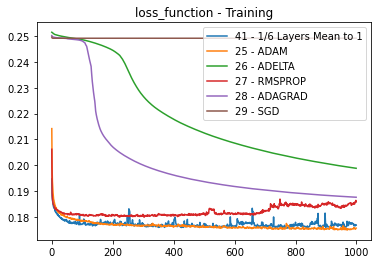

In [122]:
# Day 14-2 cell [62]
plt.plot(fit_model_A41.history["loss"])
plt.plot(fit_model_A25.history["loss"])
plt.plot(fit_model_A26.history["loss"])
plt.plot(fit_model_A27.history["loss"])
plt.plot(fit_model_A28.history["loss"])
plt.plot(fit_model_A29.history["loss"])

plt.title("loss_function - Training")
plt.legend(["41 - 1/6 Layers Mean to 1",
            "25 - ADAM",
            "26 - ADELTA",
            "27 - RMSPROP",
            "28 - ADAGRAD",
            "29 - SGD"
           ])
plt.show()

### Step 2(b): Plot and Compare the Results of each Alternative Model to the Original 

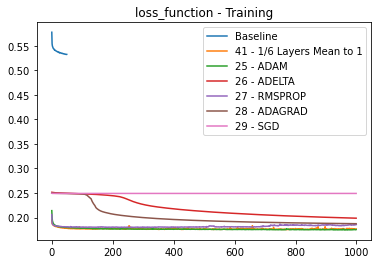

In [123]:
# Day 14-2 cell [62]
plt.plot(fit_model_00.history["loss"])
plt.plot(fit_model_A41.history["loss"])
plt.plot(fit_model_A25.history["loss"])
plt.plot(fit_model_A26.history["loss"])
plt.plot(fit_model_A27.history["loss"])
plt.plot(fit_model_A28.history["loss"])
plt.plot(fit_model_A29.history["loss"])

plt.title("loss_function - Training")
plt.legend(["Baseline", 
            "41 - 1/6 Layers Mean to 1",
            "25 - ADAM",
            "26 - ADELTA",
            "27 - RMSPROP",
            "28 - ADAGRAD",
            "29 - SGD"
           ])
plt.show()

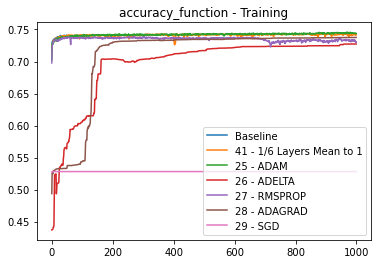

In [124]:
# Day 14-2 cell [62]
plt.plot(fit_model_00.history["accuracy"])
plt.plot(fit_model_A41.history["accuracy"])
plt.plot(fit_model_A25.history["accuracy"])
plt.plot(fit_model_A26.history["accuracy"])
plt.plot(fit_model_A27.history["accuracy"])
plt.plot(fit_model_A28.history["accuracy"])
plt.plot(fit_model_A29.history["accuracy"])

plt.title("accuracy_function - Training")
plt.legend(["Baseline", 
            "41 - 1/6 Layers Mean to 1",
            "25 - ADAM",
            "26 - ADELTA",
            "27 - RMSPROP",
            "28 - ADAGRAD",
            "29 - SGD"
           ])
plt.show()

### Step 3: Save each of your alternative models as an HDF5 file.


In [125]:
# Set the file path for the first alternative model
file_path = Path("./Resources/AlphabetSoup_A01.h5")
# Export your model to a HDF5 file
nn_A41.save(file_path)

In [126]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/AlphabetSoup_A02.h5")
# Export your model to a HDF5 file
nn_A25.save(file_path)

In [127]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/AlphabetSoup_A03.h5")
# Export your model to a HDF5 file
nn_A26.save(file_path)

In [128]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/AlphabetSoup_A04.h5")
# Export your model to a HDF5 file
nn_A27.save(file_path)

In [129]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/AlphabetSoup_A05.h5")
# Export your model to a HDF5 file
nn_A28.save(file_path)

In [130]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/AlphabetSoup_A06.h5")
# Export your model to a HDF5 file
nn_A29.save(file_path)